# Aurora Policing Project

## About the policing data

Throughout this project, I will be analyzing a dataset of traffic stops in Aurora Colorado that was collected by the "Stanford Open Policing Project". [Stanford Open Policing Project Data](https://openpolicing.stanford.edu/data/)



<table>
  <tr>
    <td>Column name</td>
    <td>Column meaning</td>
    <td>Example value</td>
  </tr>
  <tr>
    <td>raw_row_number</td>
    <td>An number used to join clean data back to the raw data</td>
    <td>38299</td>
  </tr>
  <tr>
    <td>date</td>
    <td>The date of the stop, in YYYY-MM-DD format. Some states do not provide
    the exact stop date: for example, they only provide the year or quarter in
    which the stop occurred. For these states, stop_date is set to the date at
    the beginning of the period: for example, January 1 if only year is
    provided.</td>
    <td>"2017-02-02"</td>
  </tr>
  <tr>
    <td>time</td>
    <td>The 24-hour time of the stop, in HH:MM format.</td>
    <td>20:15</td>
  </tr>
  <tr>
    <td>location</td>
    <td>The freeform text of the location. Occasionally, this represents the
    concatenation of several raw fields, i.e. street_number, street_name</td>
    <td>"248 Stockton Rd."</td>
  </tr>
  <tr>
    <td>lat</td>
    <td>The latitude of the stop. If not provided by the department, we
    attempt to geocode any provided address or location using
    Google Maps. Google Maps returns a "best effort" response, which may not
    be completely accurate if the provided location was malformed or
    underspecified. To protect against suprious responses, geocodes more than
    4 standard deviations from the median stop lat/lng are set to NA.
    <td>72.23545</td>
  </tr>
  <tr>
    <td>lng</td>
    <td>The longitude of the stop. If not provided by the department, we
    attempt to geocode any provided address or location using
    Google Maps. Google Maps returns a "best effort" response, which may not
    be completely accurate if the provided location was malformed or
    underspecified. To protect against suprious responses, geocodes more than
    4 standard deviations from the median stop lat/lng are set to NA.
    </td>
    <td>115.2808</td>
  </tr>
  
  <tr>
    <td>district</td>
    <td>Police district. If not provided, but we have retrieved police
    department shapfiles and the location of the stop, we geocode the stop and
    find the district using the shapefiles.</td>
    <td>8</td>
  </tr>
  
  <tr>
    <td>subject_age</td>
    <td>The age of the stopped subject. When date of birth is given, we
    calculate the age based on the stop date. Values outside the range of
    10-110 are coerced to NA.</td>
    <td>54.23</td>
  </tr>
  <tr>
    <td>subject_race</td>
    <td>The race of the stopped subject. Values are standardized to white,
    black, hispanic, asian/pacific islander, and other/unknown</td>
    <td>"hispanic"</td>
  </tr>
  <tr>
    <td>subject_sex</td>
    <td>The recorded sex of the stopped subject.</td>
    <td>"female"</td>
  </tr>
 
  <tr>
    <td>type</td>
    <td>Type of stop: vehicular or pedestrian.</td>
    <td>"vehicular"</td>
  </tr>
  
  <tr>
    <td>violation</td>
    <td>Specific violation of stop where provided. What is recorded here varies
    widely across police departments.</td>
    <td>"SPEEDING 15-20 OVER"</td>
  </tr>
  <tr>
    <td>citation_issued</td>
    <td>Indicates whether a citation was issued.</td>
    <td>TRUE</td>
  </tr>
  
  <tr>
    <td>outcome</td>
    <td>The strictest action taken among arrest, citation, warning, and
    summons.</td>
    <td>"citation"</td>
  </tr>
  
</table>



## Preparing the Aurora policing data for analysis

In [1167]:
# Import numpy library
import numpy as np

In [1168]:
# Import pandas library 
import pandas as pd

In [1169]:
# Import matplotlib.pyplot library 
import matplotlib.pyplot as plt

In [1170]:
# Import seaborn library
import seaborn as sns

In [1171]:
from datetime import datetime

In [1172]:
# Read file into dataframe named data 
data = pd.read_csv("co_aurora_2019_02_25 copy.csv")

### Examing the dataset

In [1173]:
# Examine the head of dataframe 
data.head()

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,type,violation,citation_issued,outcome
0,1,1/1/12,9:14:00,S I225 NB HWY AT E ALAMEDA AVE,NaN,NaN,NaN,27.376370,white,male,vehicular,Speeding (20+ Over) - Muni Statue 1101,True,citation
1,2,1/1/12,9:30:00,2600 S I225 NB HWY,NaN,NaN,NaN,23.658287,black,female,vehicular,Speeding (20+ Over) - Muni Statue 1101,True,citation
2,3,1/1/12,9:36:00,N I225 SB HWY AT E 6TH AVE,39.725279,-104.821160,2.0,23.088801,white,male,vehicular,Speeding (20+ Over) - Muni Statue 1101,True,citation
3,4,1/1/12,9:40:00,2300 BLOCK S I225 NB HWY,NaN,NaN,NaN,38.503239,white,female,vehicular,Speeding (20+ Over) - Muni Statue 1101,True,citation
4,5,1/1/12,9:46:00,E VIRGINIA PL AT S PEORIA ST,39.706912,-104.847213,1.0,75.429441,white,male,vehicular,Failed to Present Evidence of Insurance Upon R...,True,citation


In [1174]:
data.dtypes

raw_row_number       int64
date                object
time                object
location            object
lat                float64
lng                float64
district           float64
subject_age        float64
subject_race        object
subject_sex         object
type                object
violation           object
citation_issued       bool
outcome             object
dtype: object

In [1175]:
data.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'district',
       'subject_age', 'subject_race', 'subject_sex', 'type', 'violation',
       'citation_issued', 'outcome'],
      dtype='object')

#### Aurora District information 
[Aurora District (1,2,3) Map](https://wiki.radioreference.com/images/3/3b/Aurora_Beat_Map.pdf)

## Dropping columns
Dropping the columns which are not useful to analysis. 

In [1176]:
# Count the number of missing values in each column
print(data.isnull().sum())

raw_row_number         0
date                   0
time                 943
location              12
lat                31629
lng                31629
district           33838
subject_age         5863
subject_race           4
subject_sex         2006
type                4278
violation           3571
citation_issued        0
outcome                0
dtype: int64


In [1177]:
data.shape

(174363, 14)

#### Dropping raw_row_number, because I will not use this number as reference number

In [1178]:
data.drop(['raw_row_number'], axis = 'columns', inplace = True)
print(data.shape)

(174363, 13)


#### Comparing 'citation_issued' and 'outcome' columns

In [1179]:
data.citation_issued.value_counts()

True    174363
Name: citation_issued, dtype: int64

In [1180]:
data.outcome.value_counts()

citation    174363
Name: outcome, dtype: int64

In [1181]:
data.shape

(174363, 13)

All drivers were cited I can drop both 'citation_issued' and 'outcome' columns.

In [1182]:
data.drop(['citation_issued','outcome'], axis = 1 , inplace = True)

#### Dropping lat, lng, and district columns
I will analyze the data for entire Aurora city, so I will not use specific location data.

In [1183]:
# Drop 'lat', and 'lng' columns
data.drop(['lat','lng', 'district','location'], axis = 'columns', inplace = True)
print(data.shape)

(174363, 7)


I will drop 'type' column because type pedestrian only has 24 rows out of 163803. 

In [1184]:
data.type.value_counts()

vehicular     170061
pedestrian        24
Name: type, dtype: int64

#### Dropping rows having 'type' value 'pedestrian'
'type' column has very small portion of 'pedestrian'. I will drop those rows.

In [1185]:
# Check data shape befor dropping
data.shape

(174363, 7)

In [1186]:
# Drop rows which has pedestrian data
data.drop(data[data['type'] == 'pedestrian'].index, inplace = True)

In [1187]:
data.shape

(174339, 7)

In [1188]:
# Drop 'type' column
data.drop(['type'], axis = 'columns', inplace = True)

In [1189]:
# Check data shape after dropping column 'type'
data.shape

(174339, 6)

#### Dropping rows having missing values
I will drop the rows which contain any missing values if the fraction of missing row is small. (less than 5%)

In [1190]:
# Calculate the percentage of missing data 
print(data.isnull().sum()/data.shape[0])

date            0.000000
time            0.005409
subject_age     0.033630
subject_race    0.000023
subject_sex     0.011506
violation       0.020483
dtype: float64


In [1191]:
data.dropna(subset= ['time', 'subject_age', 'subject_race', 'subject_sex', 'violation'], inplace = True)
print(data.shape)

(163964, 6)


In [1192]:
# Count the number of missing values in each column (again)
print(data.isnull().sum())

date            0
time            0
subject_age     0
subject_race    0
subject_sex     0
violation       0
dtype: int64


In [1193]:
# Examine the shape of the Dataframe
data.shape

(163964, 6)

In [1194]:
### Age rounded to integer
data['subject_age'] = data['subject_age'].round().astype(int)

In [1195]:
data['subject_age'].head()

0    27
1    24
2    23
3    39
4    75
Name: subject_age, dtype: int64

In [1196]:
data.head()

,date,time,subject_age,subject_race,subject_sex,violation
0,1/1/12,9:14:00,27,white,male,Speeding (20+ Over) - Muni Statue 1101
1,1/1/12,9:30:00,24,black,female,Speeding (20+ Over) - Muni Statue 1101
2,1/1/12,9:36:00,23,white,male,Speeding (20+ Over) - Muni Statue 1101
3,1/1/12,9:40:00,39,white,female,Speeding (20+ Over) - Muni Statue 1101
4,1/1/12,9:46:00,75,white,male,Failed to Present Evidence of Insurance Upon R...


In [1197]:
data.dtypes

date            object
time            object
subject_age      int64
subject_race    object
subject_sex     object
violation       object
dtype: object

### Examining traffic violations

In [1198]:
data.violation.describe()

count                    163964
unique                      382
top       Speeding (10-19 Over)
freq                      67987
Name: violation, dtype: object

In [1199]:
data.violation.unique()

array(['Speeding (20+ Over) - Muni Statue 1101',
       'Failed to Present Evidence of Insurance Upon Request',
       'Following Too Closely', 'Drove Veh While License Suspended',
       'Speeding (10-19 Over)', 'Headlamps to be Lit',
       'Drove Veh Without Valid Drivers License',
       'Right Turn from Wrong Position Lane',
       'Failure to Signal for Turn',
       'Vehicle With Defective/Improper or No Tail Lamps',
       'Vehicle with one headlight (Muni 205(1))',
       'No License Plate Light - Muni Statute 206(3)',
       'Vehicle With Defective or No Stop Lights',
       'Expired License Plates', 'Speeding (5-9 Over) - Muni Statue 1101',
       'Glass in Vehicle Did Not Permit Norman Vision',
       'Failed to Obey Seat Belt Requirements Adult',
       'Disregarded Stop Sign',
       'Right Turn From Wrong Position - Muni Statute 901(1)(a)',
       'Speeding (25++ over)  Muni statute (1101)',
       'Left Turn to/from Wrong Position Muni Statute 901(1)(b)',
       'Drove 

In [1200]:
data.violation.value_counts().head(10)

Speeding (10-19 Over)                                       67987
Failed to Present Evidence of Insurance Upon Request        13741
Failed to Obey Seat Belt Requirements Adult                  7688
Speeding (20+ Over) - Muni Statue 1101                       7134
Disregarded Stop Sign                                        6173
Expired License Plates                                       3870
Right Turn on Red Light When Pro-Muni St 604(1)(c)(I)(A)     3005
Failed to Obey Signal Light (Muni Statute 15-5(c)(1)         2953
Failed to Observe or Disregarded Traffic Control Device      2943
Drove Veh While License Suspended                            2899
Name: violation, dtype: int64

In [1201]:
data.loc[data['violation'].str.contains("Speed") == True,'violation'].value_counts()

Speeding (10-19 Over)                                           67987
Speeding (20+ Over) - Muni Statue 1101                           7134
Speeding (25++ over)  Muni statute (1101)                        2195
Speeding (40 mph or greater over speed limit)                     811
Speeding (1-4 Over)                                               373
Speeding (5-9 Over) - Muni Statue 1101                            223
Speeding 40+ over speed limit                                     151
Speeding too Fast for Conditions - Muni Statue 1101(3)             87
Speeding (10-14 Over 65 Limit)                                     80
Speed Contest (Muni statute 1105(1)                                77
Speeding (10-19 mph over max 75 mph limit)                         65
Speeding (5-9 mph over limit)                                      65
Speeding (20-24 mph over max 75 mph limit)                         62
Speeding (20-24 mph over limit)                                    56
Speeding (1-4 mph ov

In [1202]:
# Bring all types of speeding violations into one category "Speeding"
data.loc[data['violation'].str.contains("Speed") == True,'violation'] = "Speeding"

In [1203]:
data.loc[data['violation'].str.contains("Seat Belt")== True, 'violation'].value_counts()

Failed to Obey Seat Belt Requirements Adult    7688
Failed to Obey Seat Belt Requirements          2021
Failed to Obey Seat Belt Requirements Child       1
Name: violation, dtype: int64

In [1204]:
# Bring all types of seat belt violations into one category 
data.loc[data['violation'].str.contains("Seat Belt")== True, 'violation'] = "Failed to Obey Seat Belt Requirements"

In [1205]:
data.loc[data['violation'].str.contains("Stop Sign")== True, 'violation'].value_counts()

Disregarded Stop Sign                                       6173
Driver Failed to Yield ROW at Stop Sign                      177
Disregarded Stop Sign at Through Highways                    169
Disregarded Stop Sign or Failed to Yield ROW at Thru Hwy      19
Name: violation, dtype: int64

In [1206]:
# Bring all types of stop sign violations into one category
data.loc[data['violation'].str.contains("Stop Sign")== True, 'violation'] = "Disregarded Stop Sign"

In [1207]:
data.loc[data['violation'].str.contains("License|Registration")== True, 'violation'].value_counts()

Expired License Plates                                          3870
Drove Veh While License Suspended                               2899
Drove Veh Without Valid Drivers License                         1431
Failed To Display Valid Registration/Improper Registration       201
No License Plate Light - Muni Statute 206(3)                     165
Illegal License Plate Cover                                       90
No Registration                                                   86
No License Plate Light                                            79
Drove Veh When License Revoked as Habitual Offender               79
No License Plates                                                 56
Drove Veh Without Valid License on Person                         54
Drove Veh While License Canceled                                  46
Drove Veh While License Denied                                    34
Drove Veh While License Revoked                                   25
No Registration in Vehicle        

In [1208]:
# Bring all types of license or registration violations into one category
data.loc[data['violation'].str.contains("License")== True, 'violation'] = "License/Registration Violation"

In [1209]:
data.loc[(data['violation'].str.contains("Signal Light|Red|Green")== True), 'violation'] .value_counts()

Right Turn on Red Light When Pro-Muni St 604(1)(c)(I)(A)       3005
Failed to Obey Signal Light (Muni Statute 15-5(c)(1)           2953
Violation of Green Turn Arrow - Muni Statute 604(1)(a)(II)     1547
Prohibited Right Turn on Red Signal Light                       150
Failed To Stop For Red Light At Proper Location                 148
Violation of Red Signal Light  (muni 604(1)(c)(I)                37
Failed to Yield Right of Way on Right Turn after Red             34
Cut Thru Private Property Avoid Redlight                         26
Violated Red Signal Arrow                                        22
Made Right Turn On Red Light When Prohibited (by sign)           18
Right Turn on Red Light when Prohibited                          11
No Red Light/Flag at Rear - Muni Statute 209                      5
Unauthorized Vehicle Possesion/Displayed Red Or Blue Lights       5
Violation of Red Signal Light                                     4
Green Straight Thru Arrow Alone                 

In [1210]:
# Bring all types of signal light violation into one category
data.loc[data['violation'].str.contains("Signal Light|Red Light|Green")== True, 'violation'] = "Failed to Obey Signal Lights"

In [1211]:
data.violation.value_counts().head()

Speeding                                                79564
Failed to Present Evidence of Insurance Upon Request    13741
Failed to Obey Seat Belt Requirements                    9710
License/Registration Violation                           8852
Failed to Obey Signal Lights                             7892
Name: violation, dtype: int64

In [1212]:
data.violation.value_counts(normalize = True).head()

Speeding                                                0.485253
Failed to Present Evidence of Insurance Upon Request    0.083805
Failed to Obey Seat Belt Requirements                   0.059220
License/Registration Violation                          0.053987
Failed to Obey Signal Lights                            0.048133
Name: violation, dtype: float64

Almost half of all violations are speeding, followed by insurance violations and seat belt violations.

In [1213]:
# Add 'count_violation' column to analyze 'violation' column more easily by percentage of types
data['count_violation(%)'] = data['violation'].map(data['violation'].value_counts(normalize = True))

In [1214]:
# Change 'violation' type to 'Others' where the 'count_violation'(% of total violations) is less than 1%
data.loc[data['count_violation(%)'] < 0.01, 'violation'] = 'Others'

In [1215]:
data.violation.value_counts()

Speeding                                                   79564
Others                                                     24725
Failed to Present Evidence of Insurance Upon Request       13741
Failed to Obey Seat Belt Requirements                       9710
License/Registration Violation                              8852
Failed to Obey Signal Lights                                7892
Disregarded Stop Sign                                       6538
Failed to Observe or Disregarded Traffic Control Device     2943
Made U Turn Where Prohibited (Muni Statute 603(1)           2641
Vehicle With Defective/Improper or No Tail Lamps            1867
Tinted Windows - Muni Statute 227(1)                        1861
Glass in Vehicle Did Not Permit Norman Vision               1828
Vehicle with one headlight (Muni 205(1))                    1802
Name: violation, dtype: int64

In [1216]:
data.violation.describe()

count       163964
unique          13
top       Speeding
freq         79564
Name: violation, dtype: object

In [1217]:
data.violation.unique()

array(['Speeding', 'Failed to Present Evidence of Insurance Upon Request',
       'Others', 'License/Registration Violation',
       'Vehicle With Defective/Improper or No Tail Lamps',
       'Vehicle with one headlight (Muni 205(1))',
       'Glass in Vehicle Did Not Permit Norman Vision',
       'Failed to Obey Seat Belt Requirements', 'Disregarded Stop Sign',
       'Failed to Obey Signal Lights',
       'Tinted Windows - Muni Statute 227(1)',
       'Failed to Observe or Disregarded Traffic Control Device',
       'Made U Turn Where Prohibited (Muni Statute 603(1)'], dtype=object)

In [1218]:
data.head()

,date,time,subject_age,subject_race,subject_sex,violation,count_violation(%)
0,1/1/12,9:14:00,27,white,male,Speeding,0.485253
1,1/1/12,9:30:00,24,black,female,Speeding,0.485253
2,1/1/12,9:36:00,23,white,male,Speeding,0.485253
3,1/1/12,9:40:00,39,white,female,Speeding,0.485253
4,1/1/12,9:46:00,75,white,male,Failed to Present Evidence of Insurance Upon R...,0.083805


## About the aurora weather data
[NOAA](https://www.ncdc.noaa.gov/cdo-web/)

<p style='text-align: justify;'> 
I added new weather data to determind if whether conditions have impact on police behavior. The weather data was collected by the National Centers for Environmental Information , and the duration of the weather data is from 01/01/2012 to 12/31/2016.
One possible hypothesis is that weather conditions impact on police behavior during traffic stop. Even though dataset has specific stop locatioin, I would use the data from one station("Centennial International Airpot Station") near Aurora. This is not ideal, but Aurora is a small city and airport weather statation tends to have more weather dataset than the others, it will give me a general idea of the weather condition thourghout the city. </p> 

## Preparing Aurora weather data for analysis

### Examing the dataset

In [1219]:
weather = pd.read_csv('weather.csv')

In [1220]:
weather.columns

Index(['STATION', 'NAME', 'DATE', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08',
       'WT09'],
      dtype='object')

In [1221]:
weather.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",2012-01-01,6.04,0.0,NaN,NaN,NaN,38.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",2012-01-02,6.71,0.0,NaN,NaN,NaN,50.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",2012-01-03,6.26,0.0,NaN,NaN,NaN,55.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",2012-01-04,6.04,0.0,NaN,NaN,NaN,58.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",2012-01-05,4.92,0.0,NaN,NaN,NaN,66.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* PRCP :  Precipitation
* AWND :  Wind speed
* SNOW, SNWD :  Snowfall, Snow depth
* TAVG, TAX, TMIN :  Temperature
* WT01,WT02, ..., WT09 :  Bad weather conditions 
  
     * 01 = Fog, ice fog, or freezing fog 
     * 02 = Heavy fog or heaving freezing fog 
     * 03 = Thunder
     * 04 = Ice pellets, sleet, snow pellets, or small hail
     * 05 = Hail 
     * 06 = Glaze or rime
     * 08 = Smoke or haze
     * 09 = Blowing or drifting snow
 

In [1222]:
weather.shape

(1826, 18)

In [1223]:
weather.isnull().sum()

STATION       0
NAME          0
DATE          0
AWND          0
PRCP          0
SNOW       1826
SNWD       1826
TAVG       1826
TMAX          1
TMIN          1
WT01       1381
WT02       1759
WT03       1513
WT04       1824
WT05       1804
WT06       1816
WT08       1631
WT09       1808
dtype: int64

In [1224]:
weather['DATE'] = pd.to_datetime(weather['DATE'])

In [1225]:
weather.set_index('DATE',inplace=True)

In [1226]:
weather.head()

,STATION,NAME,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
DATE,,,,,,,,,,,,,,,,,
2012-01-01,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",6.04,0.0,NaN,NaN,NaN,38.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",6.71,0.0,NaN,NaN,NaN,50.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",6.26,0.0,NaN,NaN,NaN,55.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",6.04,0.0,NaN,NaN,NaN,58.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",4.92,0.0,NaN,NaN,NaN,66.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Dropping columns 'STATION' , 'NAME', 'SNOW', 'SNOWD'

In [1227]:
weather.STATION.value_counts()

USW00093067    1826
Name: STATION, dtype: int64

In [1228]:
weather.NAME.value_counts()

DENVER CENTENNIAL AIRPORT, CO US    1826
Name: NAME, dtype: int64

Since columns 'STATION' and 'NAME' have only one value 'USW00093067' and 'CENTENNIAL AIRPORT' each, I will drop those two columns. Columns 'SNOW' and 'SNOWD' only have null values, I will also drop those columns.

In [1229]:
# Drop 'STATION' and 'NAME' columns
weather.drop(['STATION','NAME'], axis = 'columns', inplace = True)

In [1230]:
weather.shape

(1826, 15)

In [1231]:
weather.drop(['SNOW','SNWD'], axis = 'columns', inplace = True )

In [1232]:
weather.shape

(1826, 13)

<p style =  'text-align: justify; '>
Columns 'TMAX' and 'TMIN'  have to be filled in because everyday has to have max and min temperature. I will caculate the min and max temperature by using 7 consecutive days excluding the day which has null value. </p>

In [1233]:
weather[weather['TMIN'].isna()]

,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
DATE,,,,,,,,,,,,,
2015-10-02,12.08,0.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [1234]:
weather[weather['TMAX'].isna()]

,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
DATE,,,,,,,,,,,,,
2015-10-02,12.08,0.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Since null values of 'TMAX' and 'TMIN' are in the same row, I will use the same 7 consecutive days to calculate min and max temperatuer on 2015-10-02. (2015-09-29 ~ 2015-10-05) 

In [1235]:
weather.iloc[1366:1373, :]

,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
DATE,,,,,,,,,,,,,
2015-09-29,10.51,0.10,NaN,78.0,53.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2015-09-30,5.82,0.00,NaN,79.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01,8.28,0.00,NaN,83.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-02,12.08,0.00,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-03,9.17,0.00,NaN,69.0,49.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2015-10-04,6.93,0.00,NaN,65.0,46.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2015-10-05,4.92,0.14,NaN,73.0,43.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN


In [1236]:
# Get the Pandas Series of max temperature on 2015-09-29 to 2015-10-05
max_temp_for_calculation = weather.iloc[1366:1373,4]

In [1237]:
max_temp_for_calculation

DATE
2015-09-29    53.0
2015-09-30    55.0
2015-10-01    55.0
2015-10-02     NaN
2015-10-03    49.0
2015-10-04    46.0
2015-10-05    43.0
Name: TMIN, dtype: float64

In [1238]:
# Fill in max temperature by mean of 'max_tem_for_calculation' Pandas Series
weather.iloc[1369,4] = max_temp_for_calculation.mean(skipna = True)

In [1239]:
# Get the Pandas Series of min temperature on 2015-09-29 to 2015-10-05
min_temp_for_calculation = weather.iloc[1366:1373,5]

In [1240]:
# Pandas Series min_tem_for_calculation
min_temp_for_calculation

DATE
2015-09-29    NaN
2015-09-30    NaN
2015-10-01    NaN
2015-10-02    1.0
2015-10-03    NaN
2015-10-04    1.0
2015-10-05    1.0
Name: WT01, dtype: float64

In [1241]:
# Fill in min temperature by mean of 'min_temp_for_calculation' Pandas Series 
weather.iloc[1369,5] = min_temp_for_calculation.mean(skipna = True)

In [1242]:
weather.iloc[1366:1373,:]

,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
DATE,,,,,,,,,,,,,
2015-09-29,10.51,0.10,NaN,78.0,53.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2015-09-30,5.82,0.00,NaN,79.0,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01,8.28,0.00,NaN,83.0,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-02,12.08,0.00,NaN,NaN,50.166667,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-03,9.17,0.00,NaN,69.0,49.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2015-10-04,6.93,0.00,NaN,65.0,46.000000,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2015-10-05,4.92,0.14,NaN,73.0,43.000000,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN


'TMAX' and 'TMIN' on 2015-10-12 are filled in now.

#### Filliing in average temperature 'TAVG'
I will calculate the values of average temperature ('TAVG') column by calculating the mean of min and max temperature.

In [1243]:
weather['TAVG'] = weather[['TMAX','TMIN']].mean(axis=1)

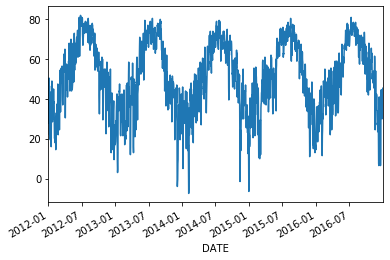

In [1244]:
weather.TAVG.plot()
plt.show()

In [1245]:
weather.head()

,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
DATE,,,,,,,,,,,,,
2012-01-01,6.04,0.0,28.0,38.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02,6.71,0.0,33.0,50.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,6.26,0.0,43.0,55.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,6.04,0.0,42.5,58.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,4.92,0.0,50.5,66.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1246]:
weather.isnull().sum()

AWND       0
PRCP       0
TAVG       0
TMAX       1
TMIN       0
WT01    1381
WT02    1759
WT03    1513
WT04    1824
WT05    1804
WT06    1816
WT08    1631
WT09    1808
dtype: int64

### Examing wind speed
Explore the wind data to check for reliability.

In [1247]:
weather['AWND'].head()

DATE
2012-01-01    6.04
2012-01-02    6.71
2012-01-03    6.26
2012-01-04    6.04
2012-01-05    4.92
Name: AWND, dtype: float64

In [1248]:
print(weather['AWND'].describe())

count    1826.000000
mean        7.847306
std         2.735757
min         0.670000
25%         6.040000
50%         7.380000
75%         9.170000
max        22.820000
Name: AWND, dtype: float64


Minimum value is above zero, and average value is greter than min and less than max. Also, the numbers are reasonable miles per hour value.

#### Creating a box plot

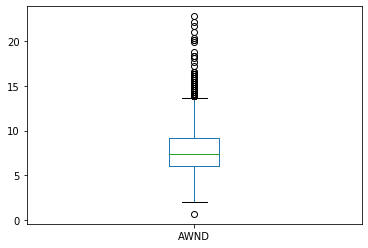

In [1249]:
weather['AWND'].plot(kind='box')
plt.show()

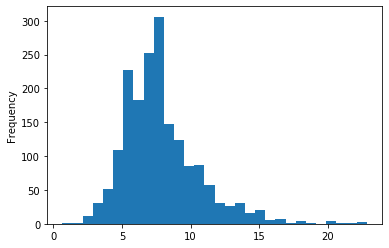

In [1250]:
weather['AWND'].plot(kind = 'hist', bins=30)
plt.show()

### Examing temperature
Explore the temperature data to check for reliability. Temperature is measured in degrees Fahrenheit.

In [1251]:
print(weather[['TAVG','TMAX','TMIN']].head())

            TAVG  TMAX  TMIN
DATE                        
2012-01-01  28.0  38.0  18.0
2012-01-02  33.0  50.0  16.0
2012-01-03  43.0  55.0  31.0
2012-01-04  42.5  58.0  27.0
2012-01-05  50.5  66.0  35.0


In [1252]:
# Create data frame 'weather_temp' only contains temperature data.
weather_temp = weather[['TAVG','TMAX', 'TMIN']]

In [1253]:
weather_temp.head()

,TAVG,TMAX,TMIN
DATE,,,
2012-01-01,28.0,38.0,18.0
2012-01-02,33.0,50.0,16.0
2012-01-03,43.0,55.0,31.0
2012-01-04,42.5,58.0,27.0
2012-01-05,50.5,66.0,35.0


In [1254]:
weather_temp.shape

(1826, 3)

In [1255]:
print(weather[['TAVG','TMAX','TMIN']].describe())

              TAVG         TMAX         TMIN
count  1826.000000  1825.000000  1826.000000
mean     50.923969    64.482740    37.373038
std      17.796639    19.339841    17.032978
min      -7.500000     0.000000   -17.000000
25%      38.000000    51.000000    25.000000
50%      51.500000    66.000000    37.000000
75%      66.500000    81.000000    53.000000
max      82.000000   100.000000    67.000000


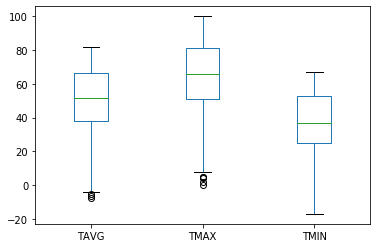

In [1256]:
weather[['TAVG', 'TMAX', 'TMIN']].plot(kind = 'box')
plt.show()

### Counting bad weather conditions
The weather dataframe contains 8 columns that start with 'WT'. Each of those represents a bad weather condition. For example, "WT05" indicates "Hail" and "WT09" indicates "Blowing or Drifting Snow". For every row in the dataset, each WT column contains either 1 or NaN meaning the weather condition is not obsereved. I will quantify "how bad" the weather was each day by summing the number of 1s in each row.

In [1257]:
# New dataframe 'WT' contains only weather conditions
WT = weather.loc[:,'WT01':'WT09']

In [1258]:
WT.isnull().count()

WT01    1826
WT02    1826
WT03    1826
WT04    1826
WT05    1826
WT06    1826
WT08    1826
WT09    1826
dtype: int64

In [1259]:
# Replace the missing values with 0.
WT = WT.fillna(0).astype('int')

In [1260]:
# Calculate the total number of 1s in each row.
weather['bad_weather'] = WT.sum(axis = 1)

In [1261]:
weather['bad_weather'].head(10)

DATE
2012-01-01    0
2012-01-02    0
2012-01-03    0
2012-01-04    0
2012-01-05    0
2012-01-06    0
2012-01-07    2
2012-01-08    0
2012-01-09    0
2012-01-10    0
Name: bad_weather, dtype: int64

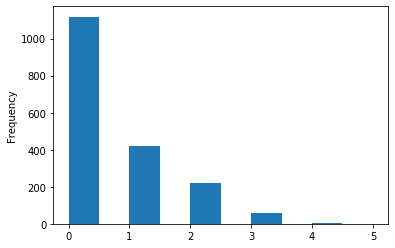

In [1262]:
# Create a histogram to visulize
weather.bad_weather.plot(kind = 'hist')
plt.show()

It looks like many days did not have any bad weather conditions and only a small portion of days had more than two bad weather conditions.

### Rating the weather conditions
I used the counts to create rating system for bad weather. I counted the unique values in the bad_weather column and sort the index and create a dictioinary called 'mapping' that maps the bad_weather integers to strings. Then I converted the bad_weather integers to strings by using the 'mapping' dictionary and stored the results in the new column called 'rating'.

* Convert 0 to 'Good'
* Convert 1 through 2 to 'Bad'
* Convert 3 through 4 to 'Worse'

In [1263]:
weather.bad_weather.value_counts().sort_index()

0    1118
1     420
2     220
3      61
4       6
5       1
Name: bad_weather, dtype: int64

In [1264]:
# Create a dictionary that maps integers to string
mapping = {0:'Good', 1:'Bad', 2:'Bad', 3: 'Worse', 4: 'Worse'}

In [1265]:
# Convert the 'bad_weather' integers to string using 'mapping'
weather['weather_rating'] = weather.bad_weather.map(mapping).astype('str')

In [1266]:
weather['weather_rating'].head()

DATE
2012-01-01    Good
2012-01-02    Good
2012-01-03    Good
2012-01-04    Good
2012-01-05    Good
Name: weather_rating, dtype: object

In [1267]:
weather['weather_rating'].value_counts()

Good     1118
Bad       640
Worse      67
nan         1
Name: weather_rating, dtype: int64

#### Changing the data type to category
There is a few poosible values, so for efficiency, I changed the data type to category and gave it a logical order.

In [1268]:
cats = ['Good', 'Bad', 'Worse']

In [1269]:
# Change the data type of 'rating' to category
weather['weather_rating'] = weather.weather_rating.astype(pd.api.types.CategoricalDtype(ordered = True, categories = cats))


In [1270]:
weather.head()

,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,bad_weather,weather_rating
DATE,,,,,,,,,,,,,,,
2012-01-01,6.04,0.0,28.0,38.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Good
2012-01-02,6.71,0.0,33.0,50.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Good
2012-01-03,6.26,0.0,43.0,55.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Good
2012-01-04,6.04,0.0,42.5,58.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Good
2012-01-05,4.92,0.0,50.5,66.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Good


I will use 'rating' column to analyze the effects of weather on police behavior.

### Creating a dataframe 'weather_rating' from 'weather' dataframe for merging
I will take only 'DATE' and 'rating' columns to create 'weather_rating' dataframe and I will merge 'data' and 'weather_rating' dataframes to analyze.

In [1271]:
weather = weather.loc[:,['weather_rating']]

In [1272]:
weather.head()

,weather_rating
DATE,
2012-01-01,Good
2012-01-02,Good
2012-01-03,Good
2012-01-04,Good
2012-01-05,Good


## Merging datasets

In [1273]:
data.head()

,date,time,subject_age,subject_race,subject_sex,violation,count_violation(%)
0,1/1/12,9:14:00,27,white,male,Speeding,0.485253
1,1/1/12,9:30:00,24,black,female,Speeding,0.485253
2,1/1/12,9:36:00,23,white,male,Speeding,0.485253
3,1/1/12,9:40:00,39,white,female,Speeding,0.485253
4,1/1/12,9:46:00,75,white,male,Failed to Present Evidence of Insurance Upon R...,0.083805


In [1274]:
data['date'] = pd.to_datetime(data['date'])

In [1275]:
weather.head()

,weather_rating
DATE,
2012-01-01,Good
2012-01-02,Good
2012-01-03,Good
2012-01-04,Good
2012-01-05,Good


In [1276]:
police_weather_data = pd.merge(left = data, right = weather, left_on = 'date', right_on = 'DATE', how = 'left')

In [1277]:
police_weather_data.head()

,date,time,subject_age,subject_race,subject_sex,violation,count_violation(%),weather_rating
0,2012-01-01,9:14:00,27,white,male,Speeding,0.485253,Good
1,2012-01-01,9:30:00,24,black,female,Speeding,0.485253,Good
2,2012-01-01,9:36:00,23,white,male,Speeding,0.485253,Good
3,2012-01-01,9:40:00,39,white,female,Speeding,0.485253,Good
4,2012-01-01,9:46:00,75,white,male,Failed to Present Evidence of Insurance Upon R...,0.083805,Good


### Creating new DatetimeIndex
I combined 'date' column and 'time' column to convert datetime format.

In [1278]:
data.date = data.date.astype(str) 

In [1279]:
data.date.head()

0    2012-01-01
1    2012-01-01
2    2012-01-01
3    2012-01-01
4    2012-01-01
Name: date, dtype: object

In [1280]:
combine = data.date.str.cat(data.time.astype(str), sep = ' ' )

In [1281]:
police_weather_data['datetime'] = pd.to_datetime(combine)

In [1282]:
police_weather_data.set_index('datetime', inplace = True)

In [1283]:
# Examine the index
police_weather_data.head()

,date,time,subject_age,subject_race,subject_sex,violation,count_violation(%),weather_rating
datetime,,,,,,,,
2012-01-01 09:14:00,2012-01-01,9:14:00,27,white,male,Speeding,0.485253,Good
2012-01-01 09:30:00,2012-01-01,9:30:00,24,black,female,Speeding,0.485253,Good
2012-01-01 09:36:00,2012-01-01,9:36:00,23,white,male,Speeding,0.485253,Good
2012-01-01 09:40:00,2012-01-01,9:40:00,39,white,female,Speeding,0.485253,Good
2012-01-01 09:46:00,2012-01-01,9:46:00,75,white,male,Failed to Present Evidence of Insurance Upon R...,0.083805,Good


In [1284]:
# Dropping unnecessary date or time columns
police_weather_data.drop(['date', 'time'], axis = 1, inplace = True)

In [1285]:
police_weather_data.head()

,subject_age,subject_race,subject_sex,violation,count_violation(%),weather_rating
datetime,,,,,,
2012-01-01 09:14:00,27,white,male,Speeding,0.485253,Good
2012-01-01 09:30:00,24,black,female,Speeding,0.485253,Good
2012-01-01 09:36:00,23,white,male,Speeding,0.485253,Good
2012-01-01 09:40:00,39,white,female,Speeding,0.485253,Good
2012-01-01 09:46:00,75,white,male,Failed to Present Evidence of Insurance Upon R...,0.083805,Good


## Does driver gender affect the violation type "Speeding"?
The question I am trying to answer is whether male and female drivers tend to commit different types of traffic violations.

In [1286]:
# Create a dataframe of female driver
female_driver = police_weather_data[police_weather_data.subject_sex == 'female']

In [1287]:
# create a dataframe of male drivers
male_driver = police_weather_data[police_weather_data.subject_sex == 'male']

In [1288]:
# Count the unique violation values of female driver
female_driver.violation.value_counts(normalize = True).head(5)

Speeding                                                0.516581
Others                                                  0.133224
Failed to Present Evidence of Insurance Upon Request    0.080892
License/Registration Violation                          0.051926
Failed to Obey Seat Belt Requirements                   0.049399
Name: violation, dtype: float64

In [1289]:
# Count unique values of violation of male driver
male_driver.violation.value_counts(normalize = True).head(5)

Speeding                                                0.465139
Others                                                  0.162077
Failed to Present Evidence of Insurance Upon Request    0.085675
Failed to Obey Seat Belt Requirements                   0.065526
License/Registration Violation                          0.055311
Name: violation, dtype: float64

In Aurora city, women are about 5 percent more likely to speed up than men, other than that, all the other categories of women and men seem pretty much similar. We usually assume that "Men are more likely to drive fast", but it is hard to tell in Aurora city data.


## Does driver race affect the violation types?
The question I am trying to answer is whether the race types drivers tend to commit different types of traffic violations. I will analyze top 5 violations.

In [1290]:
# Create a dataframe of white drivers
white = police_weather_data[police_weather_data.subject_race == 'white']

In [1291]:
# Create a dataframe of African/American drivers
black = police_weather_data[police_weather_data.subject_race == 'black']

In [1292]:
# Create a dataframe of Asian/Pacific drivers
asian_pacific = police_weather_data[police_weather_data.subject_race == 'asian/pacific islander']

In [1293]:
# Create a dataframe of all the other drivers
other = police_weather_data[police_weather_data.subject_race == 'other/unknown']

In [1294]:
# Compute the violations by white drivers as portioins
white.violation.value_counts(normalize=True).head(8)

Speeding                                                   0.523847
Others                                                     0.136139
Failed to Present Evidence of Insurance Upon Request       0.075653
Failed to Obey Seat Belt Requirements                      0.057074
Failed to Obey Signal Lights                               0.052252
Disregarded Stop Sign                                      0.040824
License/Registration Violation                             0.039414
Failed to Observe or Disregarded Traffic Control Device    0.017751
Name: violation, dtype: float64

In [1295]:
# Compute the violations by African American drivers as portion
black.violation.value_counts(normalize = True).head(8)

Speeding                                                0.415191
Others                                                  0.171782
Failed to Present Evidence of Insurance Upon Request    0.109666
Failed to Obey Seat Belt Requirements                   0.071677
License/Registration Violation                          0.069865
Failed to Obey Signal Lights                            0.035801
Disregarded Stop Sign                                   0.035046
Made U Turn Where Prohibited (Muni Statute 603(1)       0.019196
Name: violation, dtype: float64

In [1296]:
# Compute the violations by Asian drivers as portion
asian_pacific.violation.value_counts(normalize=True).head(8)

Speeding                                                0.475875
Others                                                  0.144750
Failed to Obey Signal Lights                            0.091737
Failed to Present Evidence of Insurance Upon Request    0.074757
Disregarded Stop Sign                                   0.057362
Failed to Obey Seat Belt Requirements                   0.041624
License/Registration Violation                          0.029406
Made U Turn Where Prohibited (Muni Statute 603(1)       0.023814
Name: violation, dtype: float64

In [1297]:
# Compute the violations by all the other race drivers
other.violation.value_counts(normalize=True).head(8)

Speeding                                                0.484058
Others                                                  0.142029
License/Registration Violation                          0.105797
Failed to Obey Seat Belt Requirements                   0.092029
Failed to Present Evidence of Insurance Upon Request    0.062319
Failed to Obey Signal Lights                            0.039130
Disregarded Stop Sign                                   0.027536
Made U Turn Where Prohibited (Muni Statute 603(1)       0.015217
Name: violation, dtype: float64

White driver are more likely to speed than the other race, but all drivers' main resson to get citation is "Speeding".

## Does driver age affect the violation "Speeding"?
The question I am trying to answer is whether age of driver tend to commit different types of traffic violations.

In [1298]:
# Defining bins as 0 to 18, 18 to 25, 25 to 35, 35 to 55, 55 to 75, 75 to 150
bins = [0,18,25,35,55,75,100]

In [1299]:
# Names the age group
group_names = ['Teen','Young','Adult','Mid Adult','Old','Senior']

In [1300]:
# Add 'Age_group' column to get categorical age value.
police_weather_data['age_group'] = pd.cut(police_weather_data.subject_age,bins,labels=group_names)

In [1301]:
police_weather_data.head()

,subject_age,subject_race,subject_sex,violation,count_violation(%),weather_rating,age_group
datetime,,,,,,,
2012-01-01 09:14:00,27,white,male,Speeding,0.485253,Good,Adult
2012-01-01 09:30:00,24,black,female,Speeding,0.485253,Good,Young
2012-01-01 09:36:00,23,white,male,Speeding,0.485253,Good,Young
2012-01-01 09:40:00,39,white,female,Speeding,0.485253,Good,Mid Adult
2012-01-01 09:46:00,75,white,male,Failed to Present Evidence of Insurance Upon R...,0.083805,Good,Old


In [1302]:
violation_by_age = police_weather_data.groupby(police_weather_data.age_group).violation.value_counts(normalize=True)

In [1303]:
violation_by_age

age_group  violation                                              
Teen       Speeding                                                   0.488078
           Others                                                     0.173230
           Failed to Present Evidence of Insurance Upon Request       0.100072
           License/Registration Violation                             0.055094
           Disregarded Stop Sign                                      0.044798
           Failed to Obey Signal Lights                               0.037934
           Failed to Obey Seat Belt Requirements                      0.035405
           Failed to Observe or Disregarded Traffic Control Device    0.014812
           Vehicle With Defective/Improper or No Tail Lamps           0.014090
           Vehicle with one headlight (Muni 205(1))                   0.011019
           Tinted Windows - Muni Statute 227(1)                       0.008851
           Glass in Vehicle Did Not Permit Norman Vision        

In [1304]:
%matplotlib inline

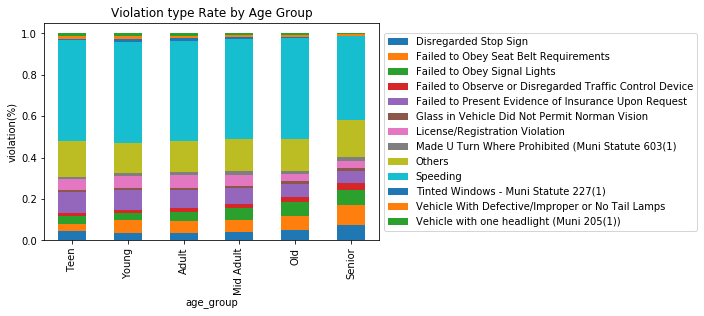

In [1305]:
# Stacked bar chart by age group
violation_by_age.unstack().plot(kind = 'bar', stacked = True)
plt.ylabel('violation(%)')
plt.title('Violation type Rate by Age Group')
plt.legend(loc = 'center left' , bbox_to_anchor = (1,0.5))
plt.show()

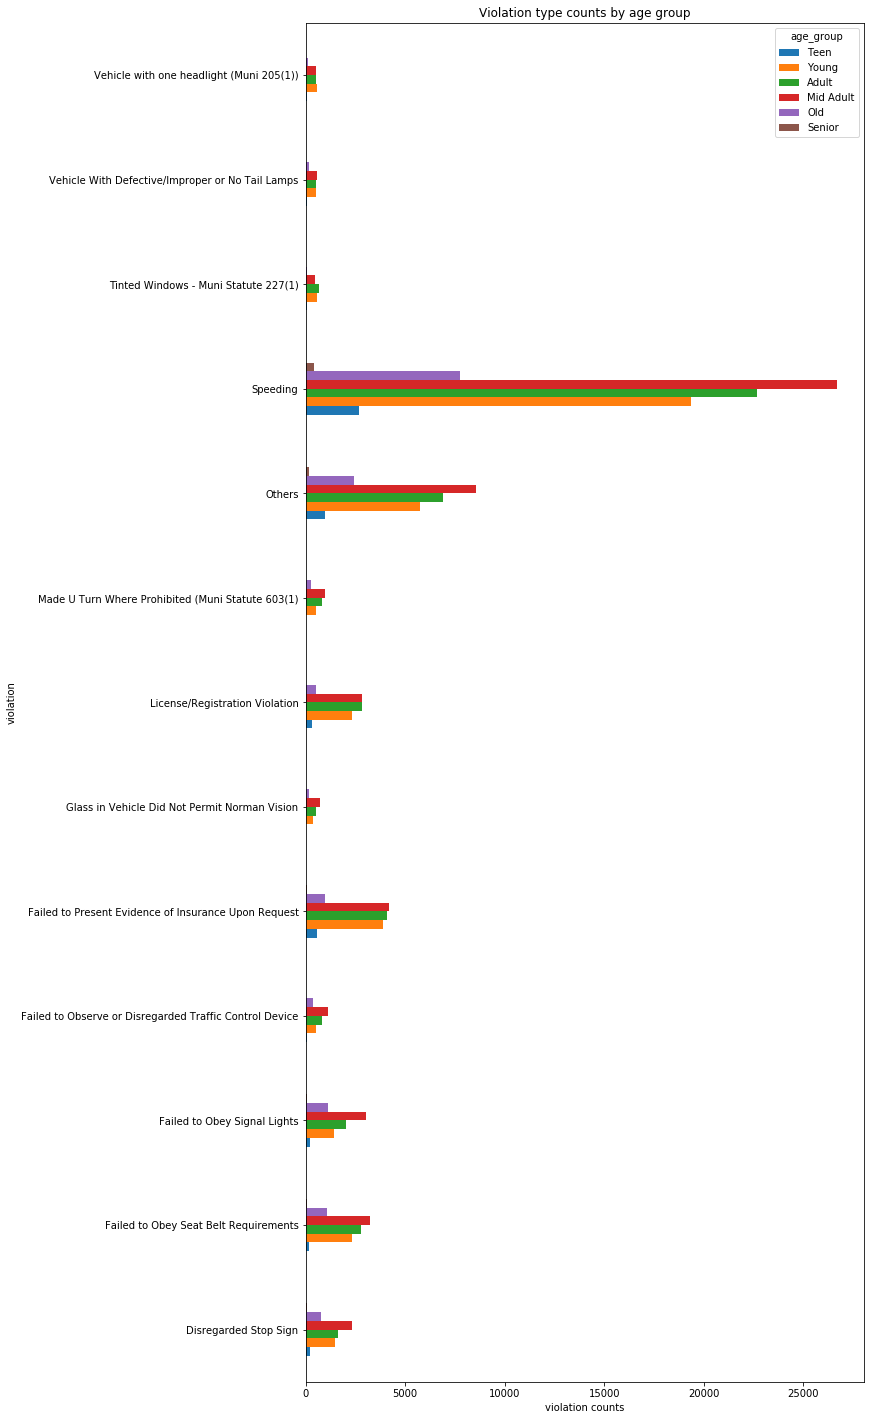

In [1306]:
pd.crosstab(police_weather_data.violation,police_weather_data.age_group).plot(kind = 'barh', figsize=(10,25))
plt.xlabel('violation counts')
plt.title('Violation type counts by age group')
plt.show()

It seems "Age" is big factor to "Speeding" in senior group but not in the other age group.

## Does time of day affect "Speeding" violation?

In [1307]:
 hourly_violation_rate = police_weather_data.groupby(police_weather_data.index.hour).violation.value_counts(normalize = True).unstack()

In [1308]:
print(hourly_violation_rate['Speeding'])

datetime
0.0     0.492114
1.0     0.470673
2.0     0.475451
3.0     0.487319
4.0     0.473805
5.0     0.488925
6.0     0.518420
7.0     0.474156
8.0     0.488406
9.0     0.483875
10.0    0.498438
11.0    0.485816
12.0    0.472033
13.0    0.482976
14.0    0.480516
15.0    0.480921
16.0    0.470117
17.0    0.468949
18.0    0.464521
19.0    0.472642
20.0    0.480565
21.0    0.482159
22.0    0.485453
23.0    0.489460
Name: Speeding, dtype: float64


In [1309]:
# Change data type to Pandas Series
speed_violation_hour = pd.Series(hourly_violation_rate['Speeding'])

In [1310]:
speed_violation_hour.describe()

count    24.000000
mean      0.481988
std       0.011444
min       0.464521
25%       0.473514
50%       0.481540
75%       0.487591
max       0.518420
Name: Speeding, dtype: float64

In [1311]:
print(speed_violation_hour.sort_values(ascending=False))

datetime
6.0     0.518420
10.0    0.498438
0.0     0.492114
23.0    0.489460
5.0     0.488925
8.0     0.488406
3.0     0.487319
11.0    0.485816
22.0    0.485453
9.0     0.483875
13.0    0.482976
21.0    0.482159
15.0    0.480921
20.0    0.480565
14.0    0.480516
2.0     0.475451
7.0     0.474156
4.0     0.473805
19.0    0.472642
12.0    0.472033
1.0     0.470673
16.0    0.470117
17.0    0.468949
18.0    0.464521
Name: Speeding, dtype: float64


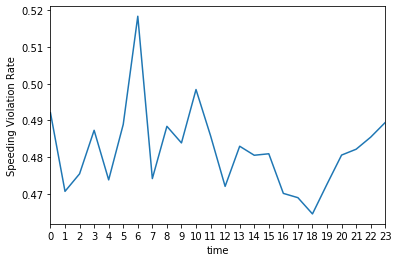

In [1312]:
speed_violation_hour.plot(xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.ylabel('Speeding Violation Rate')
plt.xlabel('time')
plt.show()

Speeding violation rate is slighly high around 6am (right before the rush hour) and slightly low around 4 to 6 (rush hour).

## Does weekday or weekend  affect to speeding violation rate?

In [1313]:
police_weather_data.head()

,subject_age,subject_race,subject_sex,violation,count_violation(%),weather_rating,age_group
datetime,,,,,,,
2012-01-01 09:14:00,27,white,male,Speeding,0.485253,Good,Adult
2012-01-01 09:30:00,24,black,female,Speeding,0.485253,Good,Young
2012-01-01 09:36:00,23,white,male,Speeding,0.485253,Good,Young
2012-01-01 09:40:00,39,white,female,Speeding,0.485253,Good,Mid Adult
2012-01-01 09:46:00,75,white,male,Failed to Present Evidence of Insurance Upon R...,0.083805,Good,Old


In [1332]:
police_weather_data['weekday_name'] = police_weather_data.index.weekday_name

In [1315]:
police_weather_data.head()

,subject_age,subject_race,subject_sex,violation,count_violation(%),weather_rating,age_group,weekday_name
datetime,,,,,,,,
2012-01-01 09:14:00,27,white,male,Speeding,0.485253,Good,Adult,Sunday
2012-01-01 09:30:00,24,black,female,Speeding,0.485253,Good,Young,Sunday
2012-01-01 09:36:00,23,white,male,Speeding,0.485253,Good,Young,Sunday
2012-01-01 09:40:00,39,white,female,Speeding,0.485253,Good,Mid Adult,Sunday
2012-01-01 09:46:00,75,white,male,Failed to Present Evidence of Insurance Upon R...,0.083805,Good,Old,Sunday


In [1320]:
week_violation = police_weather_data.groupby('weekday_name').violation.value_counts(normalize=True)

In [1328]:
week_violation_speeding = week_violation_speeding.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [1329]:
print(week_violation_speeding)

weekday_name
Monday       0.479110
Tuesday      0.491336
Wednesday    0.473144
Thursday     0.478470
Friday       0.470389
Saturday     0.496948
Sunday       0.504270
Name: violation, dtype: float64


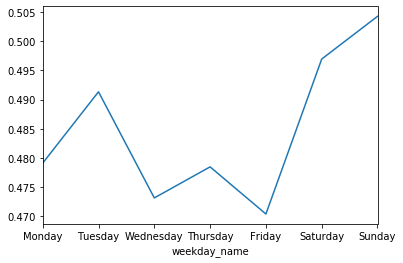

In [1330]:
week_violation_speeding.plot()
plt.show()

Speeding violation rate is slightly high on weekend than weekday.

## Does weather affect the citation rate?

In [977]:
weather_violation = police_weather_data.loc[:,['violation', 'weather_rating']]

In [827]:
weather_violation.head()

,violation,weather_rating
datetime,,
2012-01-01 09:14:00,Speeding,Good
2012-01-01 09:30:00,Speeding,Good
2012-01-01 09:36:00,Speeding,Good
2012-01-01 09:40:00,Speeding,Good
2012-01-01 09:46:00,Failed to Present Evidence of Insurance Upon R...,Good
